<a href="https://colab.research.google.com/github/trevoromondi/Hybrid-Tourism_Recommender_System/blob/main/Weighted_Hybrid_Tourism_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A weighted Hybrid Recommender System for Tourism Recommendations**

***1. Library Imporation***

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

!pip install plotly
import plotly.express as px

!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , f1_score

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_distances

!pip install nltk
import nltk
nltk.download('punkt')



Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ad9004fe11856692d94d170deb5ae11bad9529ecfa3ed7120f804a5671643d27
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

***2. Importing the Dataset***

The dataset used for the training, validation and testing consists of tourist data from Indonesia

In [3]:
#data about the destinations
data_destination = r'/content/gdrive/MyDrive/dataset/destinations.csv'

#user ratings based on destination visits
data_ratings = r'/content/gdrive/MyDrive/dataset/ratings.csv'

In [4]:
data_destination = pd.read_csv(data_destination)
data_destination

,id_wisata,nama_wisata,kategori_wisata,alamat,Unnamed: 4,Unnamed: 5
0,0,Masjid Islamic Center,Situs Suci & Agama,"Jl. Langko no. 5, Mataram, Lombok Indonesia",NaN,NaN
1,1,Lombok Epicentrum,Tempat Belanja,"Jl. Sriwijaya no. 333, Mataram, Lombok",NaN,NaN
2,2,Hutan Sesaot,"Area Wisata Alam & Taman Margasatwa, Hutan","Batu Mekar, Lingsar, Kabupaten Lombok Barat, L...",NaN,NaN
3,3,Pura Agung Narmada,Taman,"Lembuak, Narmada, Kabupaten Lombok Barat, Lombok",NaN,NaN
4,4,Pura Lingsar,Tempat Menarik & Tengara,"Jl. Raya Lingsar, Batu Kumbung, Lingsar, Kabup...",NaN,NaN
...,...,...,...,...,...,...
73,73,Pantai Gondang,Pantai,"Genggelang, Gangga, Kabupaten Lombok Utara, Lo...",NaN,NaN
74,74,Pantai Ketapang,Pantai,"Jl. Raya Bayan, Selengen, Kayangan, Kabupaten ...",NaN,NaN
75,75,Pantai Are Guling,Pantai,"Tumpak, Pujut, Kabupaten Lombok Tengah, Lombok",NaN,NaN
76,76,Pantai Bangko-Bangko,Pantai,"Jalan Putih, Batu Putih, Sekotong Tengah, Kabu...",NaN,NaN


In [5]:
data_ratings = pd.read_csv(data_ratings)
data_ratings

,id_pengguna,nama_pengguna,id_wisata,nama_wisata,rating
0,0,Supardi,0,Masjid Islamic Center,5
1,1,DEUTZ18,0,Masjid Islamic Center,5
2,2,Kanz The Traveller,0,Masjid Islamic Center,5
3,3,tholibkhair,0,Masjid Islamic Center,5
4,4,Kiki Wiryono,0,Masjid Islamic Center,4
...,...,...,...,...,...
5689,253,rizal993,74,Pantai Ketapang,5
5690,289,tjutjukbs,74,Pantai Ketapang,4
5691,3637,Rita O,74,Pantai Ketapang,4
5692,3638,Shelin,75,Pantai Are Guling,5


***3. Preprocessing Data***

In [6]:
# 1. renaming the columns in the destination data and dropping the two empty columns
data_destination_filtered = data_destination.drop(columns=['Unnamed: 4' , 'Unnamed: 5'])
data_destination_cleaned = data_destination_filtered.rename(columns = {'id_wisata' : 'destination_id' , 'nama_wisata' : 'destination_name' , 'kategori_wisata' : 'destination_category' , 'alamat' : 'location'})

In [7]:
data_destination_cleaned

,destination_id,destination_name,destination_category,location
0,0,Masjid Islamic Center,Situs Suci & Agama,"Jl. Langko no. 5, Mataram, Lombok Indonesia"
1,1,Lombok Epicentrum,Tempat Belanja,"Jl. Sriwijaya no. 333, Mataram, Lombok"
2,2,Hutan Sesaot,"Area Wisata Alam & Taman Margasatwa, Hutan","Batu Mekar, Lingsar, Kabupaten Lombok Barat, L..."
3,3,Pura Agung Narmada,Taman,"Lembuak, Narmada, Kabupaten Lombok Barat, Lombok"
4,4,Pura Lingsar,Tempat Menarik & Tengara,"Jl. Raya Lingsar, Batu Kumbung, Lingsar, Kabup..."
...,...,...,...,...
73,73,Pantai Gondang,Pantai,"Genggelang, Gangga, Kabupaten Lombok Utara, Lo..."
74,74,Pantai Ketapang,Pantai,"Jl. Raya Bayan, Selengen, Kayangan, Kabupaten ..."
75,75,Pantai Are Guling,Pantai,"Tumpak, Pujut, Kabupaten Lombok Tengah, Lombok"
76,76,Pantai Bangko-Bangko,Pantai,"Jalan Putih, Batu Putih, Sekotong Tengah, Kabu..."


In [8]:
#renaming the user rating columns
data_ratings_cleaned = data_ratings.rename(columns = {'id_pengguna': 'review_id' , 'nama_pengguna' : 'review_name' , 'id_wisata' : 'destination_id' , 'nama_wisata' : 'destination_name'})

In [9]:
data_ratings_cleaned

,review_id,review_name,destination_id,destination_name,rating
0,0,Supardi,0,Masjid Islamic Center,5
1,1,DEUTZ18,0,Masjid Islamic Center,5
2,2,Kanz The Traveller,0,Masjid Islamic Center,5
3,3,tholibkhair,0,Masjid Islamic Center,5
4,4,Kiki Wiryono,0,Masjid Islamic Center,4
...,...,...,...,...,...
5689,253,rizal993,74,Pantai Ketapang,5
5690,289,tjutjukbs,74,Pantai Ketapang,4
5691,3637,Rita O,74,Pantai Ketapang,4
5692,3638,Shelin,75,Pantai Are Guling,5


In [10]:
# 2. checking for missing values
data_destination_cleaned.isna().sum()

destination_id          0
destination_name        0
destination_category    0
location                0
dtype: int64

The destination data has no missing values

In [11]:
data_ratings_cleaned.isna().sum()

review_id           0
review_name         0
destination_id      0
destination_name    0
rating              0
dtype: int64

The ratings data has no missing values

In [12]:
#description of the data
data_destination_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination_id        78 non-null     int64 
 1   destination_name      78 non-null     object
 2   destination_category  78 non-null     object
 3   location              78 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [13]:
data_ratings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5694 entries, 0 to 5693
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5694 non-null   int64 
 1   review_name       5694 non-null   object
 2   destination_id    5694 non-null   int64 
 3   destination_name  5694 non-null   object
 4   rating            5694 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 222.5+ KB


In [14]:
data_ratings_cleaned.describe()

,review_id,destination_id,rating
count,5694.000000,5694.000000,5694.000000
mean,1523.583421,24.415174,4.229189
std,1072.041885,18.576065,0.900252
min,0.000000,0.000000,1.000000
25%,520.250000,10.000000,4.000000
50%,1458.500000,18.000000,4.000000
75%,2406.750000,36.000000,5.000000
max,3638.000000,76.000000,5.000000


Text(0, 0.5, 'Rating Frequency')

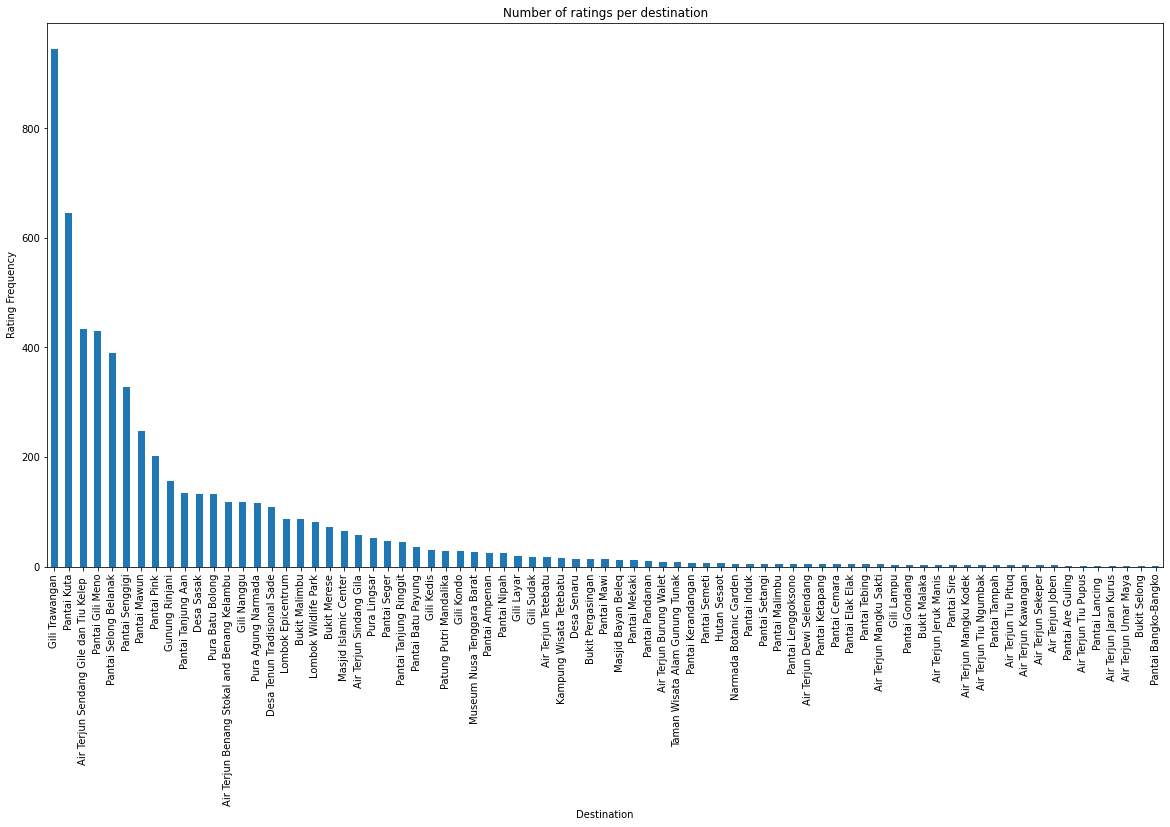

In [15]:
#plotting ratings data
ax = data_ratings_cleaned['destination_name'].value_counts().plot(kind='bar',
                                    figsize=(20,10),
                                    title="Number of ratings per destination")
ax.set_xlabel("Destination")
ax.set_ylabel("Rating Frequency")

Destinations with less than 3 rating will not be used in the training of the model

In [16]:
import string
import re

#feature merge
data_destination_cleaned['destination_metadata'] = data_destination_cleaned['destination_category'].str.cat(data_destination_cleaned ['location'], sep=', ').to_frame()

#lower case
def lower_case(text):
  return text.casefold()

data_destination_cleaned['destination_metadata'] = data_destination_cleaned['destination_metadata'].apply(lower_case)

#4. remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data_destination_cleaned['destination_metadata'] = data_destination_cleaned['destination_metadata'].apply(remove_number)

#5. remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data_destination_cleaned['destination_metadata'] = data_destination_cleaned['destination_metadata'].apply(remove_punctuation)

data_destination_cleaned.head()

,destination_id,destination_name,destination_category,location,destination_metadata
0,0,Masjid Islamic Center,Situs Suci & Agama,"Jl. Langko no. 5, Mataram, Lombok Indonesia",situs suci agama jl langko no mataram lombok...
1,1,Lombok Epicentrum,Tempat Belanja,"Jl. Sriwijaya no. 333, Mataram, Lombok",tempat belanja jl sriwijaya no mataram lombok
2,2,Hutan Sesaot,"Area Wisata Alam & Taman Margasatwa, Hutan","Batu Mekar, Lingsar, Kabupaten Lombok Barat, L...",area wisata alam taman margasatwa hutan batu ...
3,3,Pura Agung Narmada,Taman,"Lembuak, Narmada, Kabupaten Lombok Barat, Lombok",taman lembuak narmada kabupaten lombok barat l...
4,4,Pura Lingsar,Tempat Menarik & Tengara,"Jl. Raya Lingsar, Batu Kumbung, Lingsar, Kabup...",tempat menarik tengara jl raya lingsar batu k...


The destination category and location have been merged as they will form the basis for content based filtering

In [17]:
data_ratings_cleaned.head()

,review_id,review_name,destination_id,destination_name,rating
0,0,Supardi,0,Masjid Islamic Center,5
1,1,DEUTZ18,0,Masjid Islamic Center,5
2,2,Kanz The Traveller,0,Masjid Islamic Center,5
3,3,tholibkhair,0,Masjid Islamic Center,5
4,4,Kiki Wiryono,0,Masjid Islamic Center,4


In [18]:
#select the required features for collborative filtering
data_ratings_cf = pd.DataFrame({
    'review_id' : data_ratings_cleaned["review_id"],
    'destination_name' : data_ratings_cleaned["destination_name"],
    'rating' : data_ratings_cleaned["rating"]
})
data_ratings_cf.head()

,review_id,destination_name,rating
0,0,Masjid Islamic Center,5
1,1,Masjid Islamic Center,5
2,2,Masjid Islamic Center,5
3,3,Masjid Islamic Center,5
4,4,Masjid Islamic Center,4


In [19]:
corr_matrix_destination = data_ratings_cleaned.corr()
corr_matrix_destination

,review_id,destination_id,rating
review_id,1.000000,0.450376,0.018091
destination_id,0.450376,1.000000,-0.012119
rating,0.018091,-0.012119,1.000000


***3. Spliting data into Training and testing sets for Content Based Filtering***

In [33]:
#Shuffle the data
#data_destination_cleaned = data_destination_cleaned.sample(frac = 1)

#shuffle the data randomly
#train_data_cb, test_data_cb = train_test_split(data_destination_cleaned, test_size = 0.2)

In [34]:
#print("Number transactions train dataset: ", train_data_cb.shape)
#print("Number transactions test dataset: ", test_data_cb.shape)

**4. Content Based Filtering**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_distances

!pip install nltk
import nltk
nltk.download('punkt')

class rec_cb:
  def __init__(self, data, content_col):
    self.df = data_destination_cleaned
    self.content_col = content_col
    self.encoder = None
    self.bank = None

  def fit(self):
    self.encoder = TfidfVectorizer(stop_words='english', tokenizer=word_tokenize)
    self.bank = self.encoder.fit_transform(self.df[self.content_col])
  
  def recommend(self, idx, topk = 10):
    content = self.df.loc[idx, self.content_col]
    code = self.encoder.transform([content])
    dist = cosine_distances(code, self.bank)
    rec_idx = dist.argsort() [0, 0:(topk + 1)]
    recom_cb = self.df.loc[rec_idx].destination_name
    df_cosine = pd.DataFrame({'destination_name': recom_cb, 'idx' : rec_idx})
    df_cosine['cosine_distance'] = dist[0,df_cosine.idx]
    self.df['cosine_distance'] = df_cosine['cosine_distance']
    return self.df.loc[self.df.cosine_distance<= 0.6]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
recommend_cb = rec_cb('data_destination_cleaned', content_col = 'destination_metadata')
recommend_cb.fit()

In [43]:
input_b = 34
results_cb = recommend_cb.recommend(input_b)
results_cb

,destination_id,destination_name,destination_category,location,destination_metadata,cosine_distance
53,53,Air Terjun Joben,Air Terjun,"Pesanggrahan, Montong Gading, Kabupaten Lombok...",air terjun pesanggrahan montong gading kabupat...,0.569868
42,42,Air Terjun Burung Walet,Air Terjun,"Jl. Pariwisata, Tetebatu, Lombok",air terjun jl pariwisata tetebatu lombok,0.000000
65,65,Pantai Setangi,Pantai,"Jl. Raya Senggigi, Malaka, Pemenang, Kabupaten...",pantai jl raya senggigi malaka pemenang kabupa...,0.000000
57,57,Pantai Mawun,Pantai,"Desa Tumpak, Pujuk, Kabupaten Lombok Tengah, L...",pantai desa tumpak pujuk kabupaten lombok teng...,0.428687
54,54,Air Terjun Umar Maya,Air Terjun,"Sembalun, Sambik Elen, Bayan, Kabupaten Lombok...",air terjun sembalun sambik elen bayan kabupate...,0.584565
60,60,Pantai Tampah,Pantai,"Desa Mertak Sari, Kecamatan Praya Barat, Kabup...",pantai desa mertak sari kecamatan praya barat ...,0.552180
5,5,Pantai Batu Payung,Pantai,"Kuta, Pujut, Kabupaten Lombok Tengah, Lombok",pantai kuta pujut kabupaten lombok tengah lombok,0.581466
9,9,Pulau Gili Trawangan,Pulau,"Jalan Pantai, Pemenang, Lombok",pulau jalan pantai pemenang lombok,0.552180
17,17,Desa Sasak,Daerah Sekitar,"Praya, Kabupaten Lombok Tengah, Lombok",daerah sekitar praya kabupaten lombok tengah l...,0.428687


In [38]:
#recommend_cb_test = rec_cb('test_data_cb', content_col = 'destination_metadata')
#recommend_cb_test.fit()

In [39]:
#results_cb_test = recommend_cb_test.recommend(34)
#results_cb_test

In [44]:
rec = results_cb.destination_name
rec

53           Air Terjun Joben
42    Air Terjun Burung Walet
65             Pantai Setangi
57               Pantai Mawun
54       Air Terjun Umar Maya
60              Pantai Tampah
5          Pantai Batu Payung
9        Pulau Gili Trawangan
17                 Desa Sasak
Name: destination_name, dtype: object

In [45]:
data_ratings_pred = data_ratings_cleaned
data_ratings_pred

,review_id,review_name,destination_id,destination_name,rating
0,0,Supardi,0,Masjid Islamic Center,5
1,1,DEUTZ18,0,Masjid Islamic Center,5
2,2,Kanz The Traveller,0,Masjid Islamic Center,5
3,3,tholibkhair,0,Masjid Islamic Center,5
4,4,Kiki Wiryono,0,Masjid Islamic Center,4
...,...,...,...,...,...
5689,253,rizal993,74,Pantai Ketapang,5
5690,289,tjutjukbs,74,Pantai Ketapang,4
5691,3637,Rita O,74,Pantai Ketapang,4
5692,3638,Shelin,75,Pantai Are Guling,5


In [46]:
df_users = data_ratings_pred[(data_ratings_pred['review_id'] == 0)]
df_users

,review_id,review_name,destination_id,destination_name,rating
0,0,Supardi,0,Masjid Islamic Center,5


In [47]:
df_cf_new = pd.DataFrame({
    'review_id' : df_users["review_id"],
    'destination_name' : df_users["destination_name"],
    'rating' : df_users["rating"]
})
df_cf_new

,review_id,destination_name,rating
0,0,Masjid Islamic Center,5


In [48]:
review_id = input_b

In [49]:
!pip install scikit-surprise
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 4.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626483 sha256=fb20c115ebe6d8f686bed4940196538749ccd910d1cd3e9946261c73a3638cd4
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [50]:
data_pred = Dataset.load_from_df(df_cf_new, Reader())
trainset2 = data_pred.build_full_trainset()

In [54]:
model2 = SVD()
model2.fit(trainset2)

In [55]:
rating_prediction_cb = [model2.predict(review_id, destination_name).est for destination_name in rec]
df_prediction = pd.DataFrame()
df_prediction['destination_name'] = results_cb.destination_name
df_prediction['cosine_distance'] = results_cb['cosine_distance']
df_prediction['prediction_rating_cb'] = rating_prediction_cb

***5. Collaborative Filtering***

In [56]:
!pip install scikit-surprise
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

class rec_cf:
  def __init__(self, data):
    self.df = data_ratings_cf
    self.all_destinations = self.df.destination_name.unique()
    self.model = None
  
  def fit(self):
    data = Dataset.load_from_df(data_ratings_cf, Reader())
    trainset = data.build_full_trainset()
    self.model = SVD()
    self.model.fit(trainset)

  def recommend(self, review_id, topk = 77):
    rated = self.df[self.df.review_id == review_id].destination_name
    not_rated = [destination_name for destination_name in self.all_destinations if destination_name not in rated]
    score = [self.model.predict(review_id, destination_name).est for destination_name in not_rated]
    result = pd.DataFrame({'destination_name': not_rated, 'prediction_rating_cf' : score})
    return result.head(topk)
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
recommend_cf = rec_cf('data_cf')
recommend_cf.fit()

In [58]:
df_prediction2 = recommend_cf.recommend(review_id=input_b) 

***6. Hybrid Method***

The two implementations of content based filtering and collaborative based fitering will be combined

In [59]:
#feature merging
data_hybrid = pd.merge(df_prediction.sort_values(['destination_name'], ascending=[True]), df_prediction2.sort_values(['destination_name'], ascending=[True]))
data_hybrid

,destination_name,cosine_distance,prediction_rating_cb,prediction_rating_cf
0,Air Terjun Burung Walet,0.000000,5,4.346255
1,Air Terjun Joben,0.569868,5,4.273759
2,Air Terjun Umar Maya,0.584565,5,4.560122
3,Desa Sasak,0.428687,5,3.864646
4,Pantai Batu Payung,0.581466,5,4.161353
5,Pantai Mawun,0.428687,5,4.806133
6,Pantai Setangi,0.000000,5,4.374397
7,Pantai Tampah,0.552180,5,4.394718


Adding weights to attempt to improve the recommendation accuracy

In [60]:
def recommend(data):
  data['prediction_rating_hybrid'] = (0.5 * data.prediction_rating_cf) + (0.5 * data.prediction_rating_cb)
  result = data.sort_values(['prediction_rating_hybrid'], ascending=[False])
  return result

Recommendation Results

In [61]:
df_prediction

,destination_name,cosine_distance,prediction_rating_cb
53,Air Terjun Joben,0.569868,5
42,Air Terjun Burung Walet,0.000000,5
65,Pantai Setangi,0.000000,5
57,Pantai Mawun,0.428687,5
54,Air Terjun Umar Maya,0.584565,5
60,Pantai Tampah,0.552180,5
5,Pantai Batu Payung,0.581466,5
9,Pulau Gili Trawangan,0.552180,5
17,Desa Sasak,0.428687,5


In [62]:
df_prediction2

,destination_name,prediction_rating_cf
0,Masjid Islamic Center,4.859519
1,Lombok Epicentrum,4.229849
2,Hutan Sesaot,4.419883
3,Pura Agung Narmada,3.619318
4,Pura Lingsar,3.782491
...,...,...
72,Pantai Induk,4.445220
73,Pantai Gondang,4.307519
74,Pantai Ketapang,4.348547
75,Pantai Are Guling,4.470126


In [63]:
recommend(data_hybrid)

,destination_name,cosine_distance,prediction_rating_cb,prediction_rating_cf,prediction_rating_hybrid
5,Pantai Mawun,0.428687,5,4.806133,4.903066
2,Air Terjun Umar Maya,0.584565,5,4.560122,4.780061
7,Pantai Tampah,0.552180,5,4.394718,4.697359
6,Pantai Setangi,0.000000,5,4.374397,4.687198
0,Air Terjun Burung Walet,0.000000,5,4.346255,4.673128
1,Air Terjun Joben,0.569868,5,4.273759,4.636879
4,Pantai Batu Payung,0.581466,5,4.161353,4.580676
3,Desa Sasak,0.428687,5,3.864646,4.432323
